In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix



In [18]:
df = pd.read_csv('suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
df.drop(['User ID'], axis=1, inplace = True)

In [20]:
le = LabelEncoder()

In [21]:
#converting gender column to numerical value
df['Gender'] = le.fit_transform(df['Gender'])

In [22]:
sc = StandardScaler()

In [24]:
#scailing the data
df.iloc[:,:3]  = sc.fit_transform(df.iloc[:,:3])


In [25]:
X = df.drop(['Purchased'], axis=1)

In [26]:
Y = df['Purchased']

In [27]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state=99)

In [28]:
dt = DecisionTreeClassifier()

In [29]:
dt.fit(train_x, train_y)

DecisionTreeClassifier()

In [30]:
y_pred  = dt.predict(test_x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [31]:
results = pd.DataFrame({'Actual' : test_y, 'Predicted' : y_pred})
results

,Actual,Predicted
61,0,0
348,0,0
163,0,0
7,1,1
275,1,1
...,...,...
259,1,0
241,0,0
106,0,0
200,0,0


In [33]:
print("Accuracy Score",accuracy_score(test_y, y_pred)*100)

Accuracy Score 86.66666666666667


In [35]:
print("Confusion Matrix\n",confusion_matrix(test_y,y_pred))

Confusion Matrix
 [[76  7]
 [ 9 28]]


[Text(816.2538461538461, 1037.7818181818182, 'Age <= 0.654\ngini = 0.471\nsamples = 280\nvalue = [174, 106]\nclass = 0'),
 Text(530.8153846153846, 938.9454545454546, 'EstimatedSalary <= 0.61\ngini = 0.275\nsamples = 194\nvalue = [162, 32]\nclass = 0'),
 Text(260.4, 840.1090909090909, 'Age <= -0.11\ngini = 0.071\nsamples = 162\nvalue = [156, 6]\nclass = 0'),
 Text(220.33846153846153, 741.2727272727273, 'gini = 0.0\nsamples = 112\nvalue = [112, 0]\nclass = 0'),
 Text(300.46153846153845, 741.2727272727273, 'EstimatedSalary <= 0.404\ngini = 0.211\nsamples = 50\nvalue = [44, 6]\nclass = 0'),
 Text(260.4, 642.4363636363637, 'EstimatedSalary <= 0.14\ngini = 0.153\nsamples = 48\nvalue = [44, 4]\nclass = 0'),
 Text(120.18461538461538, 543.6, 'Age <= -0.015\ngini = 0.056\nsamples = 35\nvalue = [34, 1]\nclass = 0'),
 Text(80.12307692307692, 444.76363636363635, 'EstimatedSalary <= -0.183\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(40.06153846153846, 345.9272727272727, 'gini = 0.

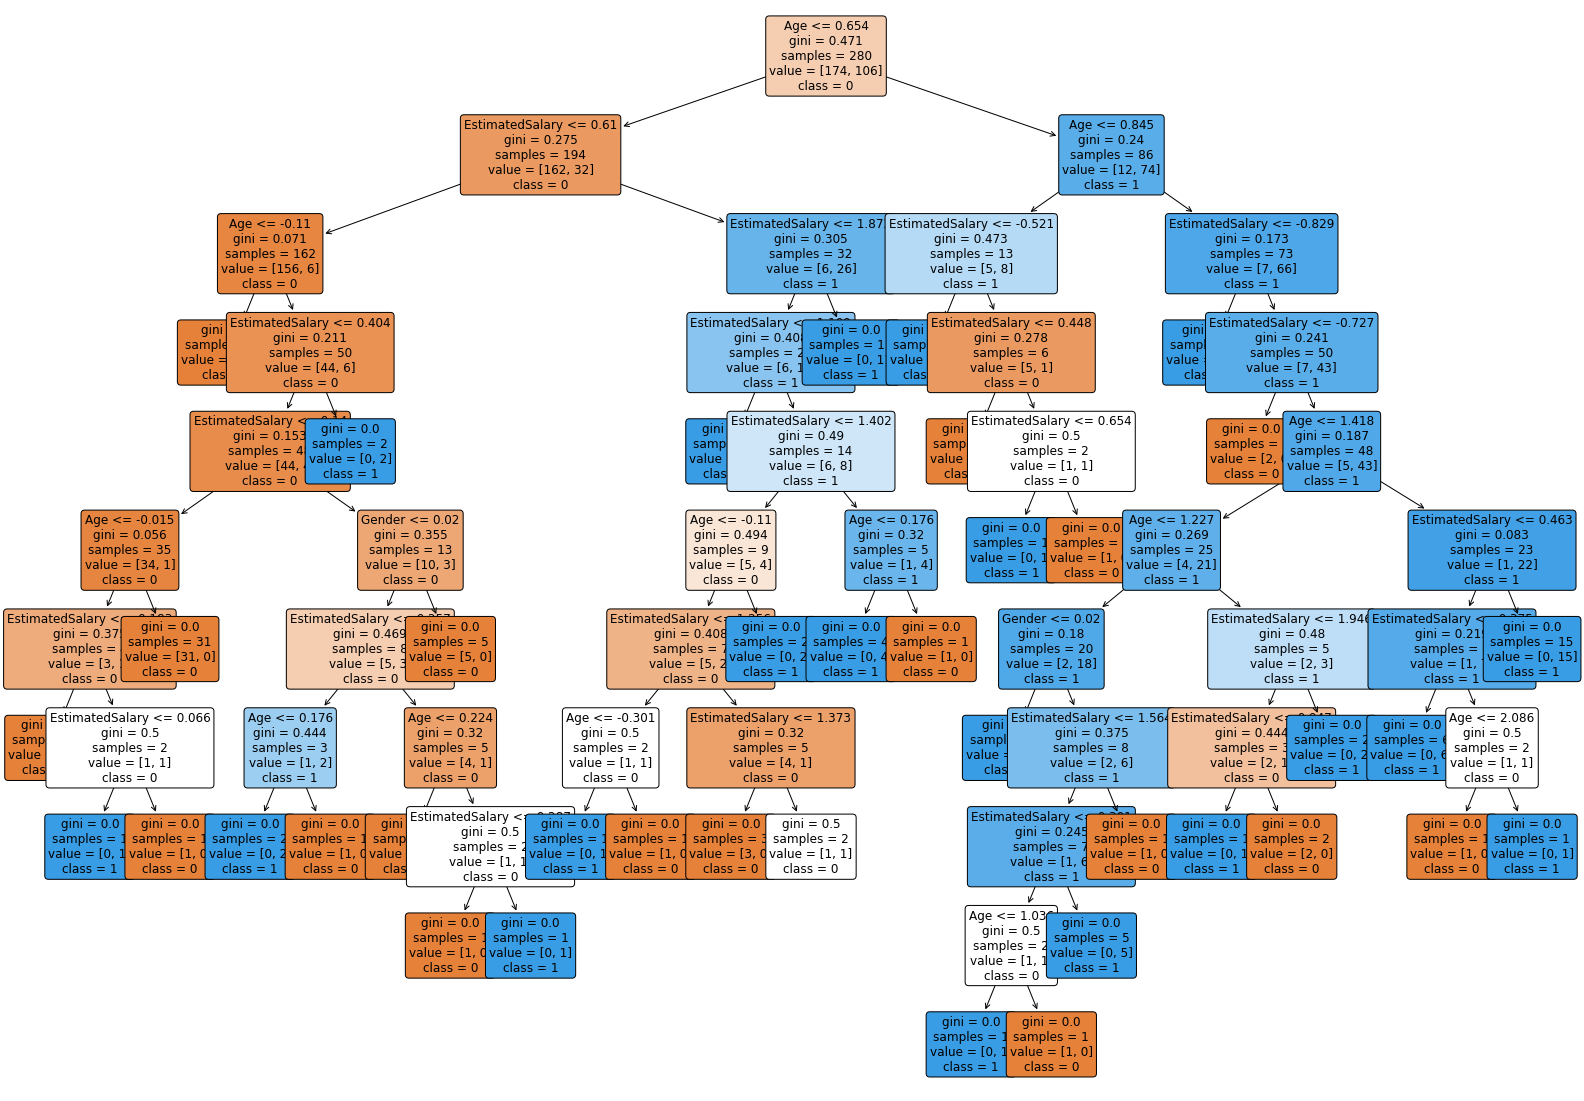

In [37]:
fig=plt.figure(figsize=(28,20))

tree.plot_tree(dt, feature_names=train_x.columns, class_names=['0','1'], filled=True, rounded=True, fontsize=12)

In [38]:
fig.savefig("decistion_tree.png")